# **Manipulación y preparación de datos**

In [1]:
#Importacion de librerias necesarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics




In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
%load_ext autoreload
%autoreload 2

import os
import sys

Importar los conjuntos de datos con los que se trabajará.

In [8]:
# data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MNA/MLOps/data/Algerian_forest_fires_dataset_UPDATE_RegionAdd.csv",sep=',', header='infer')
# print(data.shape)
# data.head()

In [4]:
from src.stages.data_cleanup import data_cleanup

#data = pd.read_csv("../data/interim/Algerian_forest_fires_dataset_UPDATE_RegionAdd.csv",sep=',', header='infer')
data_cleanup('params.yaml')

ModuleNotFoundError: No module named 'src'

**Realizar tareas de limpieza de datos, eliminando valores nulos o inconsistentes.**

In [10]:
#Revisamos detalles de la informacion proporcionada en el datase
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5    RH          244 non-null    int64  
 6    Ws          244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    object 
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    object 
 14  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [11]:
#Verificamos el nombre de las columnas
# data.columns

Index(['Region', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [12]:
#Observamos que RH y Ws tienen un espacio al inicio por lo que corregimos eliminandolo del header
#De la misma manera eliminamos los espacios al final en las columnas Classes y Rain
# data.rename(columns={' RH':'RH', ' Ws': 'Ws', 'Classes  ':'Classes', 'Rain ':'Rain'}, inplace=True)
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5   RH           244 non-null    int64  
 6   Ws           244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    object 
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    object 
 14  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


In [13]:
# #Realizamos una inspeccion de valores unicos para las variables categoricas
# print(f"Classes: {data['Classes'].unique()} \n")

# print(f"Region {data['Region'].unique()} \n")

# #Detectamos que los valores de Classes contienen espacios extras por lo cual procedemos a eliminarlos
# #El valor nulo se va a limpiar en el siguiente paso
# data['Classes'] = data['Classes'].str.strip()

# #Imprimimos de nuevo los valores unicos:
# print(f"Classes: {data['Classes'].unique()} \n")

Classes: ['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' nan] 

Region ['Bejaia' 'Sidi-Bel Abbes'] 

Classes: ['not fire' 'fire' nan] 



In [14]:
#Detectamos los valores nulos e inconsistentes
# valores_nulos = data.isnull().sum()
# valores_nulos

Region         0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [15]:
# #Buscamos la informacion nula o inconsistente
# data[data.isnull().any(axis=1)]

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,Sidi-Bel Abbes,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [16]:
# #Limpiamos el dataframe de la info inconsistente
# data_limpia = data.dropna()
# data_limpia.shape

(243, 15)

In [17]:
# #Detectamos los valores nulos e inconsistentes de nuevo
# valores_nulos = data_limpia.isnull().sum()
# valores_nulos

Region         0
day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

**Realizar transformaciones necesarias para preparar los datos para el análisis y modelado.**

En base a lo mencionado en la pagina de donde se obtuvo el dataset sabemos que tenemos variables

Categoricas:


*   region
*   Classes

Enteras:

*   day
*   month
*   year
*   Temperature
*   RH
*   Ws

Continua:

*   Rain
*   FFMC
*   DMC
*   DC
*   ISI
*   BUI
*   FWI






In [18]:
# data_limpia.head()

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,Bejaia,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,Bejaia,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,Bejaia,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,Bejaia,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,Bejaia,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [19]:
#Realizamos la transformacion de variables en el dataframe a su correcto formato
# columnas_categoricas = ['Classes', 'Region']
# columnas_enteras = ['day', 'month', 'year']
# columnas_continuas = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# data_transformada = data_limpia.copy()
# data_transformada[columnas_categoricas] = data_limpia[columnas_categoricas].astype('category')
# data_transformada[columnas_enteras] = data_limpia[columnas_enteras].astype('int64')
# data_transformada[columnas_continuas] = data_limpia[columnas_continuas].astype('float64')


In [20]:
#La informacion se encuentra lista para el siguiente paso
#data_transformada.info()


<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Region       243 non-null    category
 1   day          243 non-null    int64   
 2   month        243 non-null    int64   
 3   year         243 non-null    int64   
 4   Temperature  243 non-null    float64 
 5   RH           243 non-null    float64 
 6   Ws           243 non-null    float64 
 7   Rain         243 non-null    float64 
 8   FFMC         243 non-null    float64 
 9   DMC          243 non-null    float64 
 10  DC           243 non-null    float64 
 11  ISI          243 non-null    float64 
 12  BUI          243 non-null    float64 
 13  FWI          243 non-null    float64 
 14  Classes      243 non-null    category
dtypes: category(2), float64(10), int64(3)
memory usage: 27.3 KB


# Exploración y preprocesamiento de datos

**Realizar análisis exploratorio de datos (EDA) utilizando visualizaciones y estadísticas descriptivas**.

In [21]:
#muestras de datos
data_transformada.head()

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,Bejaia,1,6,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,Bejaia,2,6,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,Bejaia,3,6,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,Bejaia,4,6,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,Bejaia,5,6,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [22]:
#Tipo de datos
data_transformada.dtypes

Region         category
day               int64
month             int64
year              int64
Temperature     float64
RH              float64
Ws              float64
Rain            float64
FFMC            float64
DMC             float64
DC              float64
ISI             float64
BUI             float64
FWI             float64
Classes        category
dtype: object

In [23]:
#Informacion de los datos
data_transformada.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Region       243 non-null    category
 1   day          243 non-null    int64   
 2   month        243 non-null    int64   
 3   year         243 non-null    int64   
 4   Temperature  243 non-null    float64 
 5   RH           243 non-null    float64 
 6   Ws           243 non-null    float64 
 7   Rain         243 non-null    float64 
 8   FFMC         243 non-null    float64 
 9   DMC          243 non-null    float64 
 10  DC           243 non-null    float64 
 11  ISI          243 non-null    float64 
 12  BUI          243 non-null    float64 
 13  FWI          243 non-null    float64 
 14  Classes      243 non-null    category
dtypes: category(2), float64(10), int64(3)
memory usage: 27.3 KB


In [24]:
#Informacion estadistica del dataset
data_transformada.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


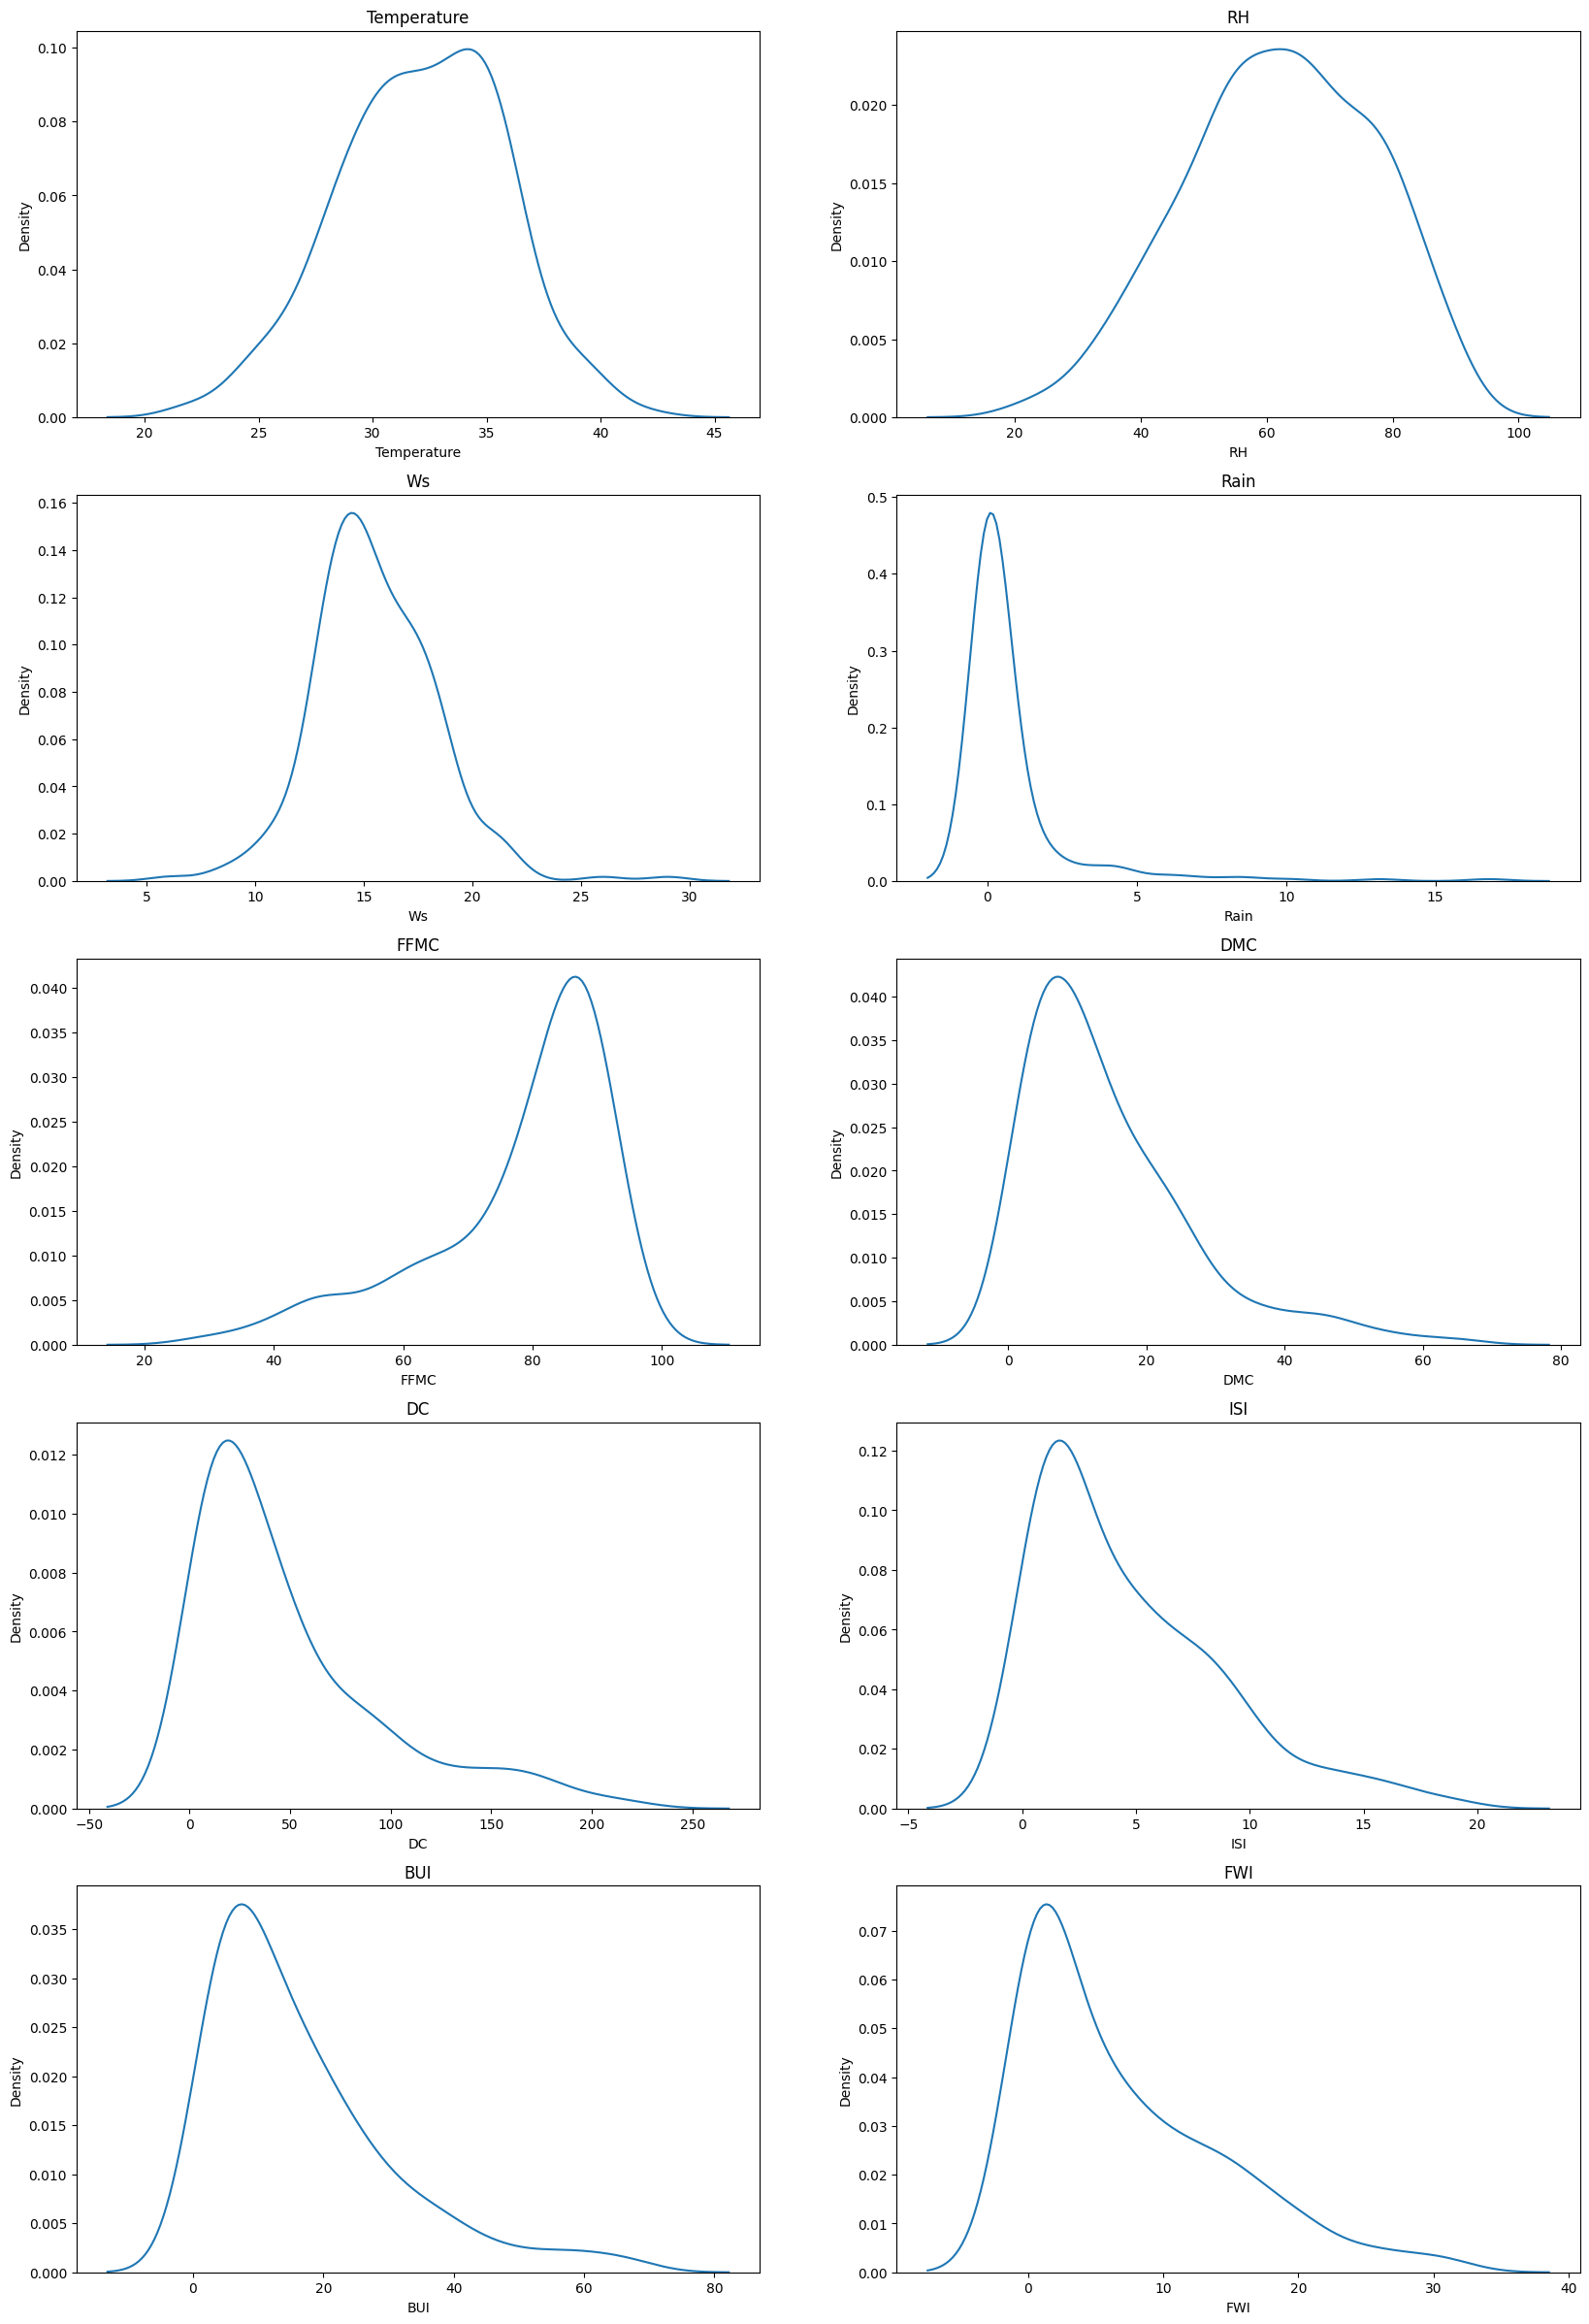

In [25]:
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
#Day, month, year aunque son de tipo numerico no se grafican ya que no agregan valor
#Para los tipo float utilizamos graficos para ver su distribucion
axes = axes.flatten()

for col, ax in zip(columnas_continuas, axes):
  sns.kdeplot(data=data_transformada, x=col, ax=ax)
  ax.set_title(col)

plt.show()

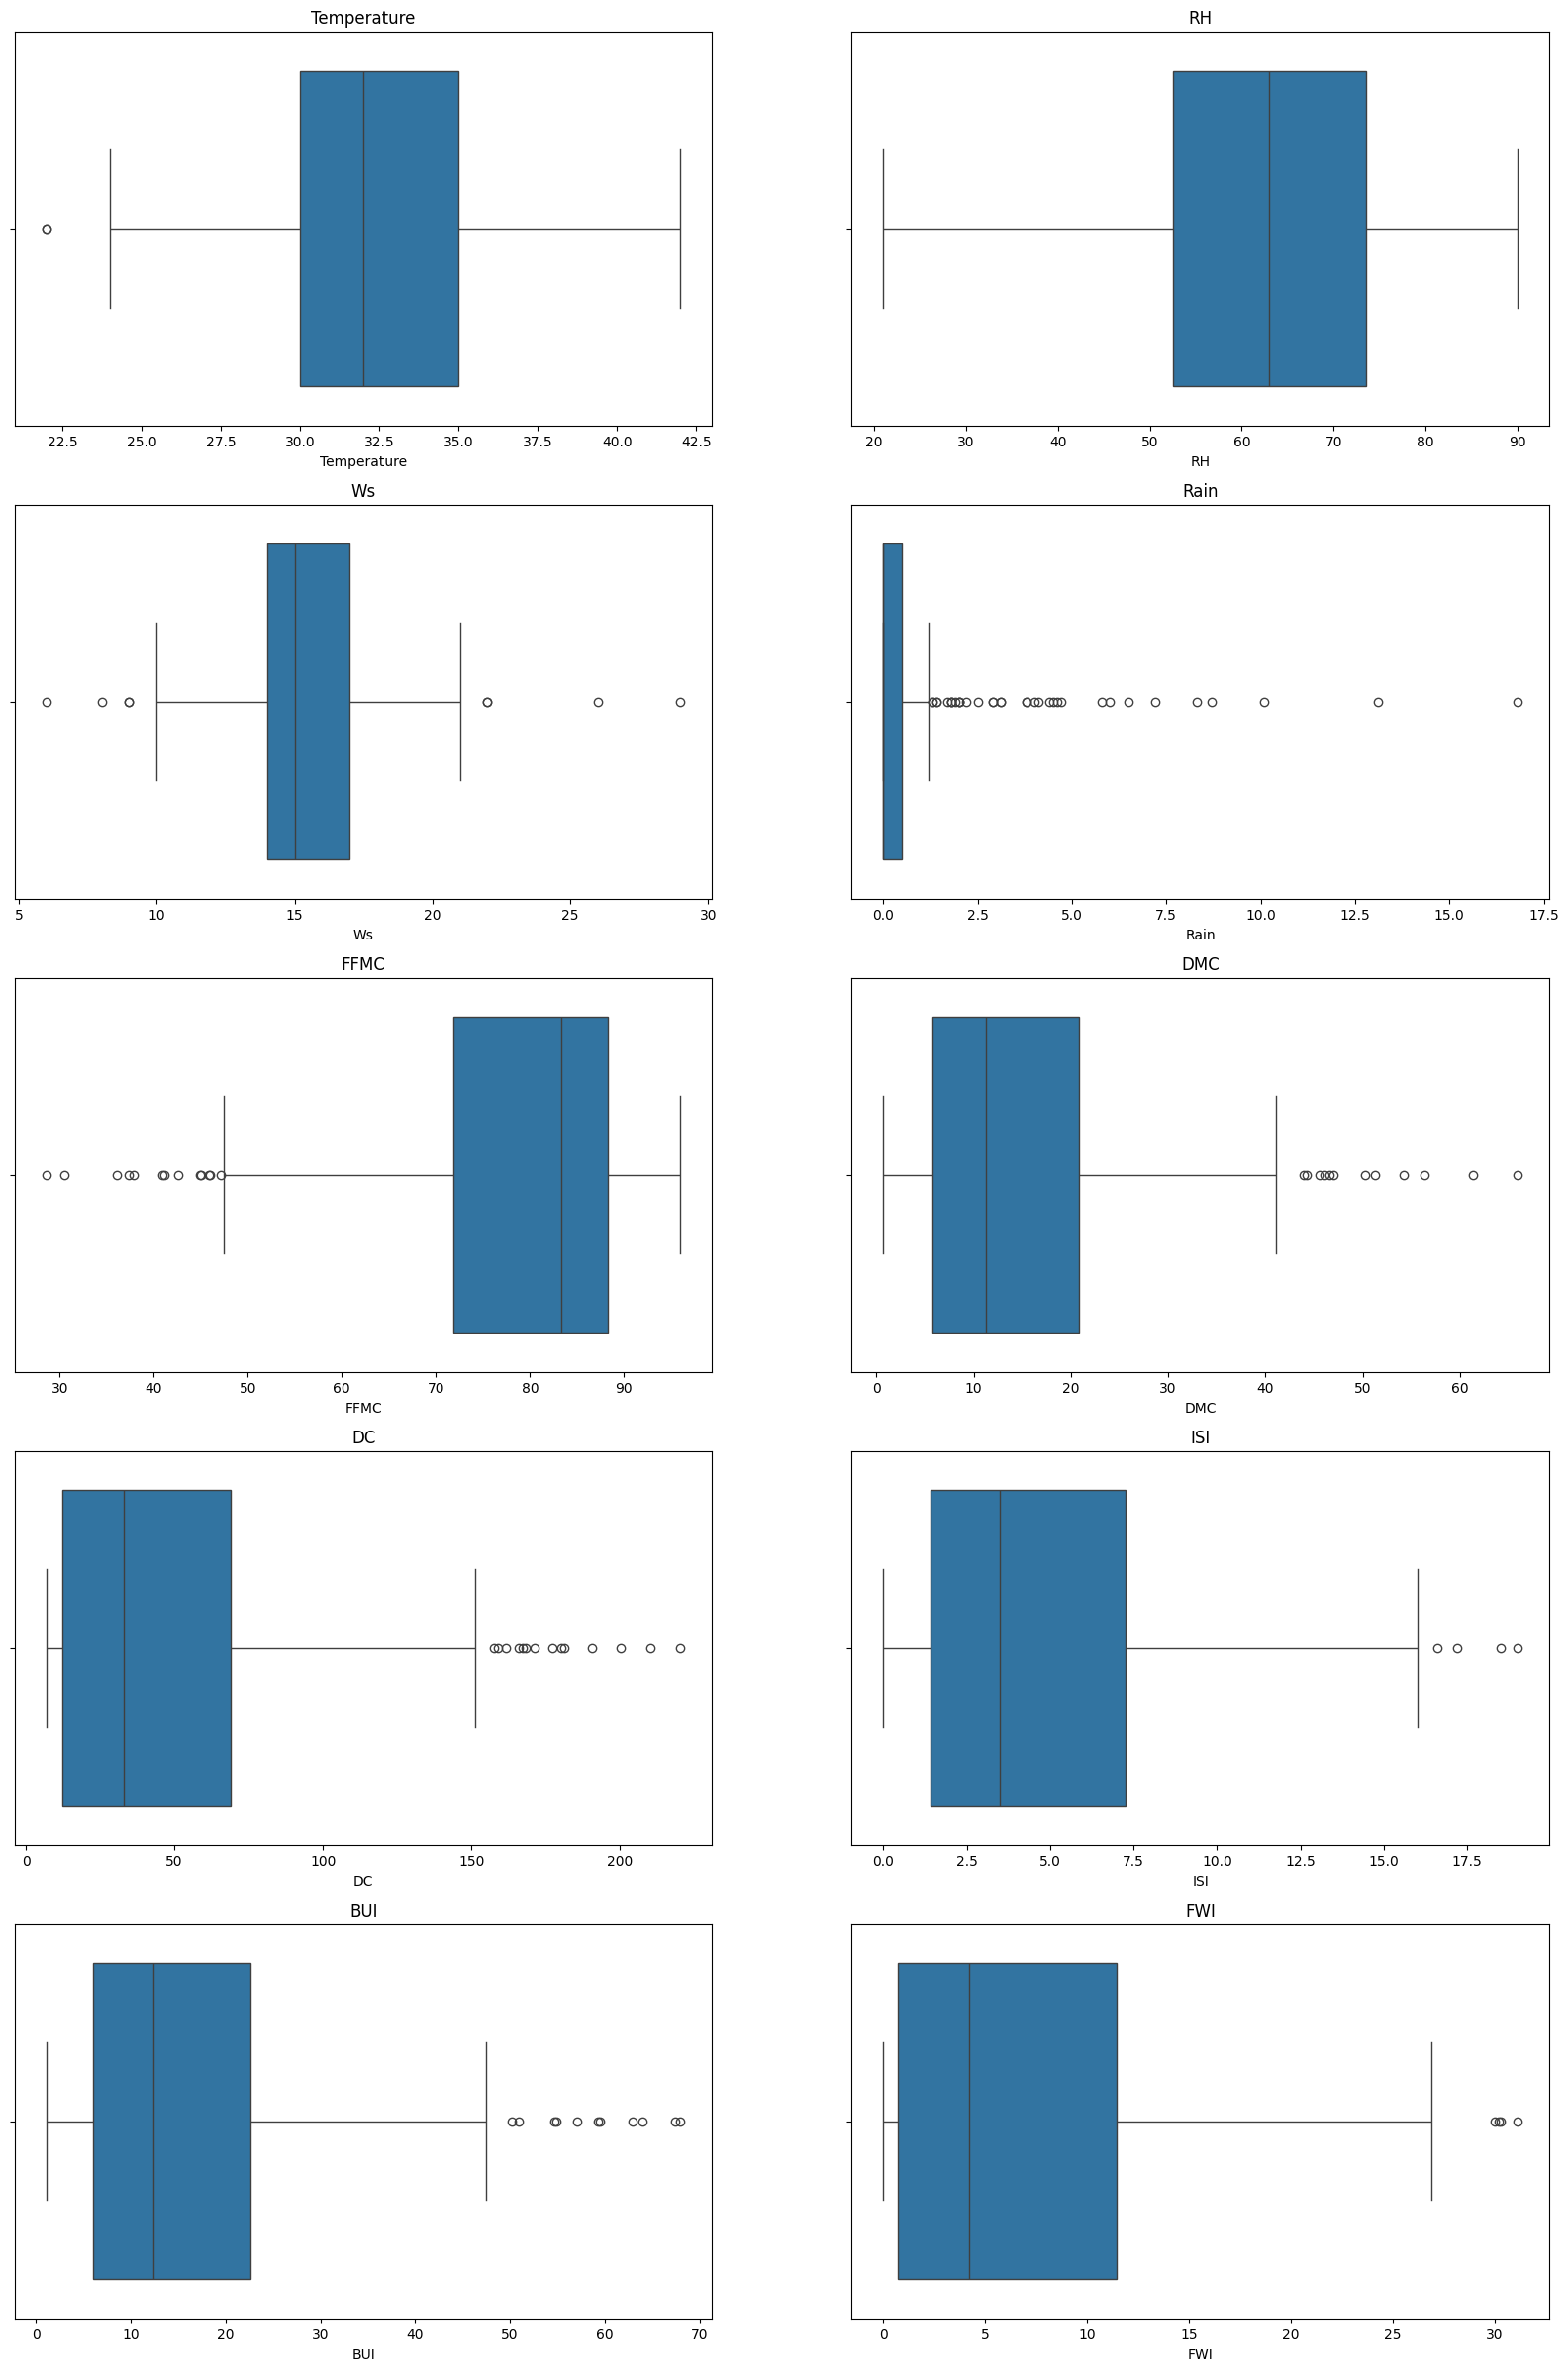

In [26]:
#tambien usamos grafico de bigotes para detectar datos atipicos
fig, axes = plt.subplots(5, 2, figsize=(20, 30))
axes = axes.flatten()

for col, ax in zip(columnas_continuas, axes):
  sns.boxplot(data=data_transformada, x=col, ax=ax)
  ax.set_title(col)

plt.show()

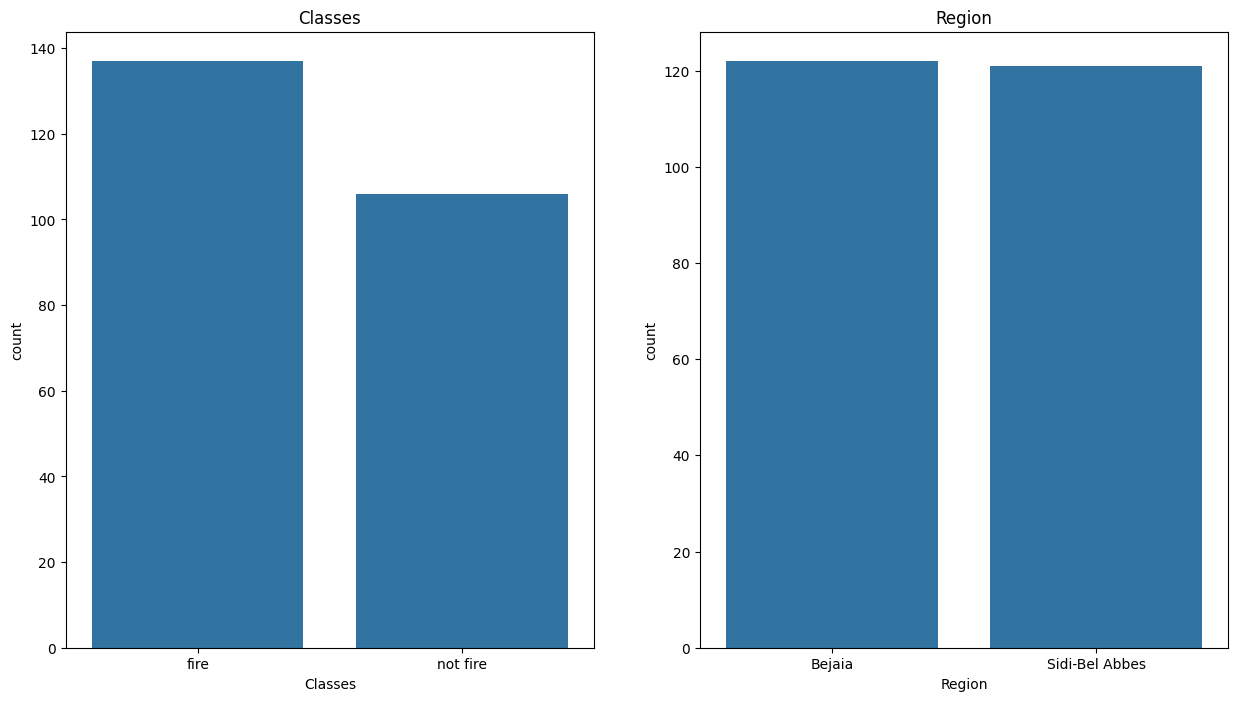

In [27]:
#Para las variables categoricas las representamos en un grafico de barras
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
axes = axes.flatten()

for col, ax in zip(columnas_categoricas, axes):
  sns.countplot(data=data_transformada, x=col, ax=ax)
  ax.set_title(col)

plt.show()

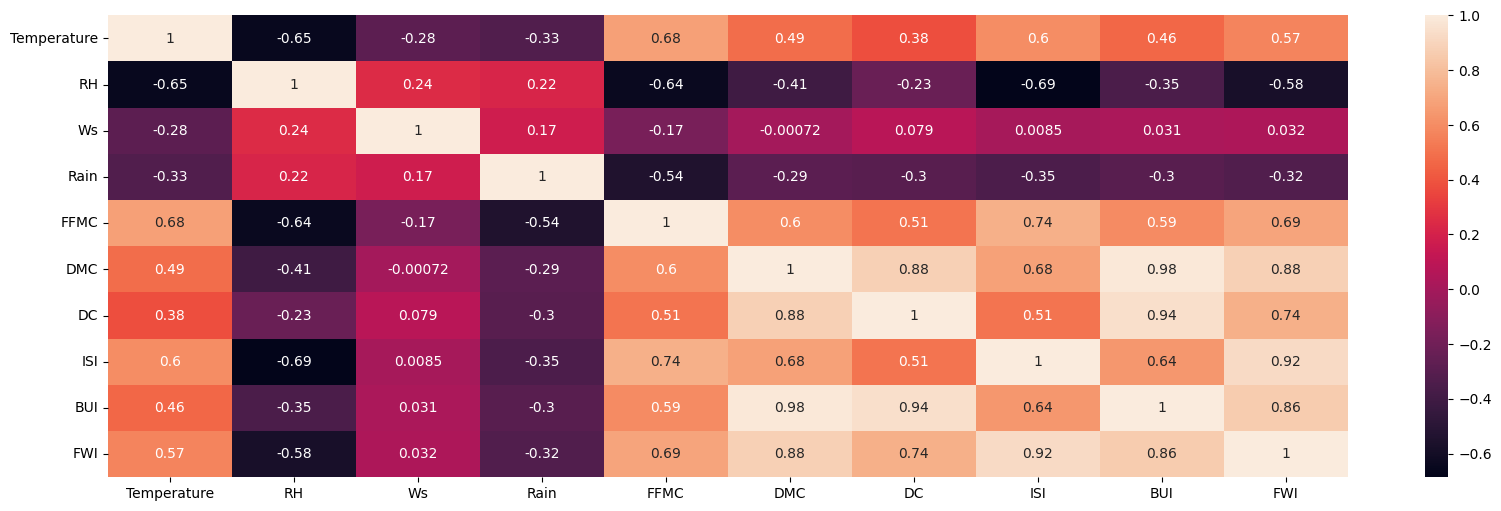

In [28]:
#tambien vale la pena checar las correlaciones
df_correlaciones = data_transformada.select_dtypes(include='float64').corr()

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(df_correlaciones, annot=True, ax=ax)
plt.show()

**Aplicar técnicas de preprocesamiento como normalización, codificación de variables categóricas y reducción de dimensionalidad.**

In [29]:
#Escalers


In [30]:
#Para reducir la dimensionalidad podemos aplicar PCA
y = data_transformada.loc[:,'Classes']
data_transformada.drop(columns=['Classes'], inplace=True)
X = data_transformada.select_dtypes(include=['float64', 'int64', 'category'])

In [31]:
total_componentes = X.shape[1]
total_componentes

escalar = StandardScaler()
min_max = MinMaxScaler()
x_scaled = escalar.fit_transform(X.select_dtypes(include=['float64', 'int64']))
x_minmax = min_max.fit_transform(x_scaled)

pca = PCA(n_components=0.95)
x_proyectada = pca.fit_transform(x_minmax)
x_proyectada = pd.DataFrame(x_proyectada)

x_proyectada

,0,1,2,3,4,5,6
0,-0.619660,-0.432432,0.302617,-0.169042,0.050265,0.024179,0.041973
1,-0.635521,-0.427094,0.259830,-0.137794,-0.023284,0.120474,0.165468
2,-0.915191,-0.368394,-0.071769,-0.439255,0.447368,0.328943,-0.203518
3,-0.986660,-0.362778,-0.140330,-0.408979,0.154805,0.212061,0.256845
4,-0.667576,-0.420125,0.061891,-0.237545,-0.003953,-0.086795,0.116511
...,...,...,...,...,...,...,...
238,0.142770,0.475995,-0.251121,0.239690,-0.025108,-0.141107,0.072799
239,-0.520532,0.556520,-0.617932,0.129436,0.184196,0.155081,0.006176
240,-0.507484,0.543676,-0.665382,0.047766,0.366871,-0.215902,-0.339917
241,-0.189352,0.506477,-0.365806,0.434788,0.175419,-0.223699,0.106429


# **Construcción, ajuste y evaluación de Modelos de Machine Learning**

**Seleccionar algoritmos de Machine Learning adecuados para resolver el problema planteado.**

In [32]:
#Eliminamos las columnas que no añaden valor
X = X.drop(columns=['day', 'month', 'year'])

#Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




#para las variables continuas vamos a aplicar Normalizacion usando MinMaxScaler
numericas_pipeline = Pipeline( steps=[
    ('minmax', MinMaxScaler()),
    ('scaler', StandardScaler()),
    ('PCA', PCA(n_components=0.95))
] )


#para las variables cate vamos a aplicar OneHot
catOHE_pipeline = Pipeline( steps=[
    ('OneHotEncoder', OneHotEncoder())
] )

columnas_categoricas = ['Region']
columnasTransformer = ColumnTransformer(transformers=[
        ('numericas_continuas', numericas_pipeline, columnas_continuas),
        ('categoricas', catOHE_pipeline, columnas_categoricas)
        ])


In [33]:
modeloRL = LogisticRegression(penalty='l2', C=100, solver='liblinear', max_iter=1000, random_state=55)
pipelineRL = Pipeline(steps=[('ct',columnasTransformer),('modeloRL',modeloRL)])
pipelineRL.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('numericas_continuas',
                                                  Pipeline(steps=[('minmax',
                                                                   MinMaxScaler()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('PCA',
                                                                   PCA(n_components=0.95))]),
                                                  ['Temperature', 'RH', 'Ws',
                                                   'Rain', 'FFMC', 'DMC', 'DC',
                                                   'ISI', 'BUI', 'FWI']),
                                                 ('categoricas',
                                                  Pipeline(steps=[('OneHotEncoder',
                                                                   OneHotEncoder())]),
                                                  ['Region'])])),
                ('modeloRL',
                 LogisticRegression(C=100, max_iter=1000, random_state=55,
                                    solver='liblinear'))])

In [34]:
print(">>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación con Logistic Regresion:")
y_pred_trainRL = pipelineRL.predict(X_train)
y_pred_testRL = pipelineRL.predict(X_test)
print('accuracy-train', metrics.accuracy_score(y_train, y_pred_trainRL))
print('accuracy-test', metrics.accuracy_score(y_test, y_pred_testRL))

print("\n>>Matriz de Confusión:")
print(metrics.confusion_matrix(y_test, y_pred_testRL))

print("\n>>Reporte varias métricas:")
print(metrics.classification_report(y_test, y_pred_testRL))

>>Exactitud (Accuracy) de los conjuntos de Entrenamiento y Validación con Logistic Regresion:
accuracy-train 0.9742268041237113
accuracy-test 0.9387755102040817

>>Matriz de Confusión:
[[25  2]
 [ 1 21]]

>>Reporte varias métricas:
              precision    recall  f1-score   support

        fire       0.96      0.93      0.94        27
    not fire       0.91      0.95      0.93        22

    accuracy                           0.94        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.94      0.94      0.94        49

